In [1]:
# # Importing Required Libraries
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# # Data Preprocessing of Abalone Dataset

df_abalone = pd.read_csv('/kaggle/input/abalone-wine/abalone.csv', names=['Sex', 'Length', 'Diameter', 'Height', 
                                       'Whole weight', 'Shucked weight', 
                                       'Viscera weight', 'Shell weight',
                                       'Rings'])


# Checking if there is any null values
nan_count = df_abalone.isna().sum().sum()
nan_count


# It's found that there is no null values in this abalone dataset

# # Data Preprocessing of Wine Dataset
df_wine_red = pd.read_csv('/kaggle/input/abalone-wine/winequality-red.csv', sep=';')
df_wine_white =  pd.read_csv('/kaggle/input/abalone-wine/winequality-white.csv', sep=';')
print(df_wine_red)
print(df_wine_white)
print(df_abalone)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Applying PCA on Abalone Dataset

In [2]:
object_df_PCA = df_abalone.select_dtypes(include='object')
numeric_df_PCA = df_abalone.select_dtypes(exclude='object')
object_df_encoding_PCA = pd.get_dummies(object_df_PCA,drop_first=True)
df_abalone_PCA = pd.concat([object_df_encoding_PCA,numeric_df_PCA],axis = 1)
df_abalone_PCA_copy = df_abalone_PCA.copy()
df_abalone_PCA = df_abalone_PCA.drop(['Rings'],axis=1)
df_abalone_PCA

,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Normalization of Abalone

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaled_abalone = MinMaxScaler()
scaled_abalone_X = scaled_abalone.fit_transform(df_abalone_PCA)
print(scaled_abalone_X)
Raw_Abalone = pd.DataFrame(scaled_abalone_X,columns= df_abalone_PCA.columns)

[[0.         1.         0.51351351 ... 0.15030262 0.1323239  0.14798206]
 [0.         1.         0.37162162 ... 0.06624075 0.06319947 0.06826109]
 [0.         0.         0.61486486 ... 0.17182246 0.18564845 0.2077728 ]
 ...
 [0.         1.         0.70945946 ... 0.3527236  0.37788018 0.30543099]
 [0.         0.         0.74324324 ... 0.35642233 0.34298881 0.29347285]
 [0.         1.         0.85810811 ... 0.63517149 0.49506254 0.49177877]]


# 1 Representation Learning
You will apply PCA and LDA onto the dataset, analyse the resulting new representations in terms
of interpretability and classifier impact, then create new reduced dimension datasets for use in later
questions.
1. Run PCA on each dataset, look at the total variance explained by the principle components.
At least, show a plot of the first two principle components using easily distinguishable colours
and markers to indicate the labels of each datapoint.
2. Plot and show a scree-plot to look at the cumulative variance represented by the PCA
eigenvectors.

## ***PCA on Abalone***

In [6]:
n_comp_abalone_PCA = 9
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train_A, X_test_A = train_test_split(scaled_abalone_X,test_size=0.2, random_state=0)
pca_model_abalone = PCA(n_components=n_comp_abalone_PCA)
pca_train_abalone = pca_model_abalone.fit(X_train_A)
pca_results_abalone = pca_model_abalone.transform(scaled_abalone_X)
pca_results_abalone

array([[ 0.51741738, -0.49282036, -0.20817392, ..., -0.02053565,
         0.01734247, -0.00241039],
       [ 0.41352841, -0.65157055, -0.3946501 , ..., -0.00294593,
        -0.00089576,  0.00143804],
       [-0.05250826,  0.33140678, -0.35994954, ..., -0.00435221,
         0.00516873, -0.00724484],
       ...,
       [ 0.71422337, -0.19275762,  0.14704521, ...,  0.03828178,
         0.00401942,  0.00302291],
       [ 0.0764757 ,  0.52784919, -0.12508379, ..., -0.01256853,
        -0.00418128,  0.01624664],
       [ 0.89528526,  0.08264643,  0.47878679, ..., -0.00240417,
        -0.00401501, -0.00551265]])

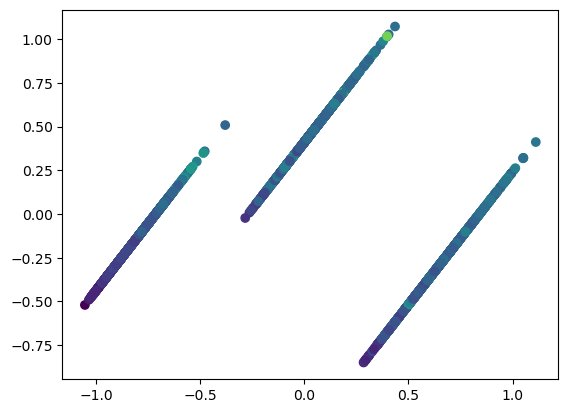

In [7]:
plt.scatter(pca_results_abalone[:,0],pca_results_abalone[:,1],c=df_abalone_PCA_copy['Rings'])

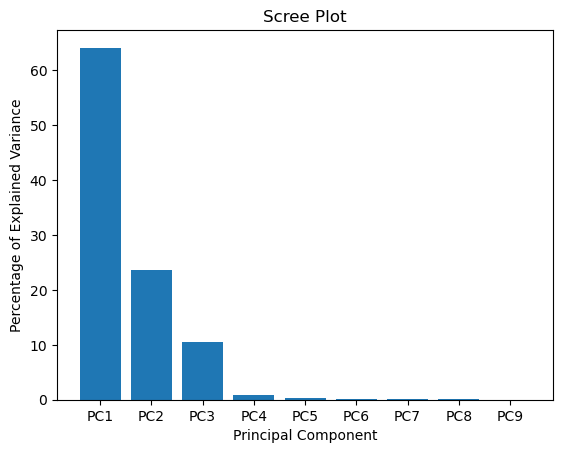

In [8]:
percent_variance_abalone =  np.round(pca_model_abalone.explained_variance_ratio_*100,decimals = 1)
lables = ['PC' + str(x) for x in range(1,len(percent_variance_abalone)+1)]
plt.bar(x = range(1,len(percent_variance_abalone)+1),
        height = percent_variance_abalone, tick_label = lables)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title('Scree Plot')
plt.show()

In [9]:
col_abalone = []
for i in range(1,n_comp_abalone_PCA+1):
    
    appendcol_abalone = ("PC"+ str(i))
    col_abalone.append(appendcol_abalone)
    
df_PCA_A = pd.DataFrame(pca_results_abalone,columns=col_abalone)
df_PCA_A

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.517417,-0.492820,-0.208174,-0.024831,-0.007956,0.013906,-0.020536,0.017342,-0.002410
1,0.413528,-0.651571,-0.394650,0.049234,0.000425,0.006214,-0.002946,-0.000896,0.001438
2,-0.052508,0.331407,-0.359950,-0.073243,0.004787,0.001948,-0.004352,0.005169,-0.007245
3,0.517438,-0.492826,-0.208626,-0.010962,0.002435,-0.001728,0.007601,0.028679,-0.000064
4,-0.902108,-0.287274,-0.023565,0.057039,0.001621,0.004083,-0.003101,0.010707,-0.004494
...,...,...,...,...,...,...,...,...,...
4172,0.013633,0.432183,-0.240328,-0.027530,-0.018471,-0.051478,0.012589,0.008965,0.007097
4173,0.657236,-0.279509,0.044626,-0.025699,-0.027701,-0.003967,-0.017370,-0.023003,0.000691
4174,0.714223,-0.192758,0.147045,0.015178,-0.024272,-0.037075,0.038282,0.004019,0.003023
4175,0.076476,0.527849,-0.125084,-0.023353,-0.049891,-0.005758,-0.012569,-0.004181,0.016247


## ***PCA on Wine***

In [11]:
df_wine_red['colour'] = 1
df_wine_white['colour'] = 0
df_wine = pd.concat([df_wine_red,df_wine_white])
df_wine_copy = df_wine.copy()
df_wine = df_wine.drop('quality',axis =1)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


## Normalization of Wine

In [13]:
scaled_wine = MinMaxScaler()
scaled_wine_X = scaled_wine.fit_transform(df_wine)
print(scaled_wine_X)
Raw_wine = pd.DataFrame(scaled_wine_X,columns = df_wine.columns)

[[0.29752066 0.41333333 0.         ... 0.19101124 0.20289855 1.        ]
 [0.33057851 0.53333333 0.         ... 0.25842697 0.26086957 1.        ]
 [0.33057851 0.45333333 0.02409639 ... 0.24157303 0.26086957 1.        ]
 ...
 [0.2231405  0.10666667 0.11445783 ... 0.13483146 0.20289855 0.        ]
 [0.14049587 0.14       0.18072289 ... 0.08988764 0.69565217 0.        ]
 [0.18181818 0.08666667 0.22891566 ... 0.05617978 0.55072464 0.        ]]


In [14]:
n_comp_wine_PCA = 12

pca_model_wine = PCA(n_components=n_comp_wine_PCA)
X_train_W, X_test_W = train_test_split(scaled_wine_X,test_size=0.2, random_state=0)
pca_train_W = pca_model_wine.fit(X_train_W)
pca_results_wine = pca_model_wine.transform(scaled_wine_X)
pca_results_wine

array([[ 0.83043419, -0.08480524, -0.2617125 , ..., -0.00234792,
         0.01067239, -0.00541241],
       [ 0.81881427, -0.10796037, -0.09443789, ..., -0.00430611,
         0.03290722, -0.00094243],
       [ 0.81619898, -0.08848626, -0.09839517, ..., -0.0044241 ,
         0.00597501, -0.00364079],
       ...,
       [-0.26445311, -0.11644308,  0.03435514, ..., -0.02545122,
         0.01230407, -0.00808565],
       [-0.25420188,  0.3970078 , -0.07391226, ..., -0.01315524,
        -0.03475296,  0.00170565],
       [-0.26224641,  0.25515398, -0.01073762, ..., -0.02442843,
        -0.01418862,  0.0053702 ]])

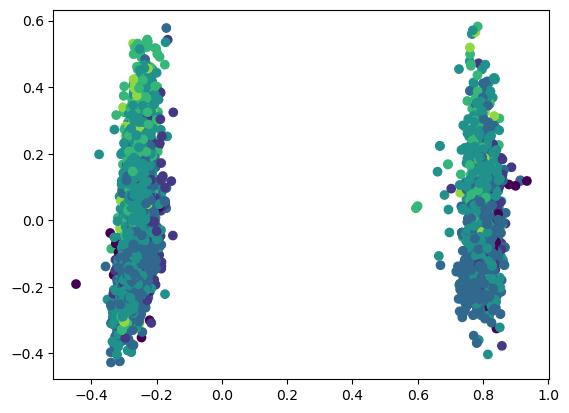

In [15]:
plt.scatter(pca_results_wine[:,0],pca_results_wine[:,1],c=df_wine_copy['quality'])

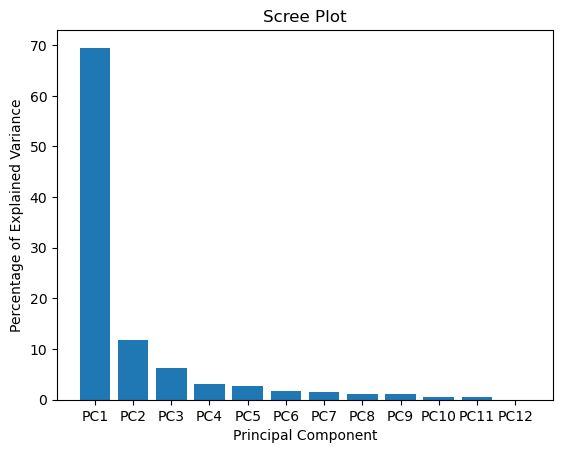

In [16]:
percent_variance_wine =  np.round(pca_model_wine.explained_variance_ratio_*100,decimals = 1)
lables = ['PC' + str(x) for x in range(1,len(percent_variance_wine)+1)]
plt.bar(x = range(1,len(percent_variance_wine)+1),
        height = percent_variance_wine, tick_label = lables)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title('Scree Plot')
plt.show()

In [17]:
percent_variance_wine

array([69.5, 11.7,  6.2,  3.1,  2.7,  1.7,  1.6,  1.2,  1.2,  0.6,  0.5,
        0. ])

In [18]:
col_wine = []
for i in range(1,n_comp_wine_PCA+1):
    
    appendcol_wine = ("PC"+ str(i))
    col_wine.append(appendcol_wine)
    
df_PCA_W = pd.DataFrame(pca_results_wine,columns=col_wine)
df_PCA_W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.830434,-0.084805,-0.261712,-0.112019,-0.029667,-0.061694,0.006287,0.010443,-0.040191,-0.002348,0.010672,-0.005412
1,0.818814,-0.107960,-0.094438,-0.200664,0.170123,0.001113,0.103656,-0.012397,-0.025243,-0.004306,0.032907,-0.000942
2,0.816199,-0.088486,-0.098395,-0.157874,0.085571,0.000756,0.065336,-0.003522,-0.027364,-0.004424,0.005975,-0.003641
3,0.769957,-0.158699,0.278262,0.115216,-0.086010,-0.059435,-0.103030,-0.047124,-0.060844,-0.008217,-0.007753,0.014629
4,0.830434,-0.084805,-0.261712,-0.112019,-0.029667,-0.061694,0.006287,0.010443,-0.040191,-0.002348,0.010672,-0.005412
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.242828,0.170195,-0.039458,-0.012822,-0.102819,0.024045,0.015470,-0.017151,-0.004709,-0.002225,0.002551,-0.000530
6493,-0.284612,-0.148966,-0.029781,-0.002186,0.046976,0.017703,-0.019159,-0.029978,0.018252,-0.010854,0.044268,0.005583
6494,-0.264453,-0.116443,0.034355,-0.166094,-0.089638,0.103398,0.032322,-0.062544,-0.053348,-0.025451,0.012304,-0.008086
6495,-0.254202,0.397008,-0.073912,-0.004763,0.005403,-0.001125,-0.046821,-0.037162,0.034269,-0.013155,-0.034753,0.001706


# LDA on Abalone

In [20]:
n_comp_abalone_LDA = len(df_abalone_PCA.columns)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
abalone_y = df_abalone_PCA_copy['Rings']
X_train_AL,X_test_AL,y_train_AL,y_test_AL = train_test_split(scaled_abalone_X, abalone_y, test_size=0.2, random_state=0)

lda_model_abalone = LDA(n_components=n_comp_abalone_LDA)
lda_model_train = lda_model_abalone.fit(X_train_AL,y_train_AL)
lda_results_abalone = lda_model_abalone.transform(scaled_abalone_X)
lda_results_abalone

array([[-0.40423607, -0.18623912,  0.068138  , ..., -0.81199243,
        -1.24513899,  0.26361156],
       [-1.84267598,  0.35762078,  0.52317175, ...,  0.02246469,
        -0.56791362, -0.78090724],
       [ 0.93522029, -0.18953237, -0.76957934, ...,  0.58098059,
         0.36596987,  1.33235612],
       ...,
       [ 1.07715587, -0.47087691,  0.63151773, ..., -0.49365963,
         0.92397443, -1.80618268],
       [ 0.93381188, -1.50880368,  0.95250066, ...,  1.11553641,
         0.22702871,  1.00757602],
       [ 0.90242591,  0.25825972,  2.05695233, ..., -1.9758687 ,
        -0.52603237, -0.62332036]])

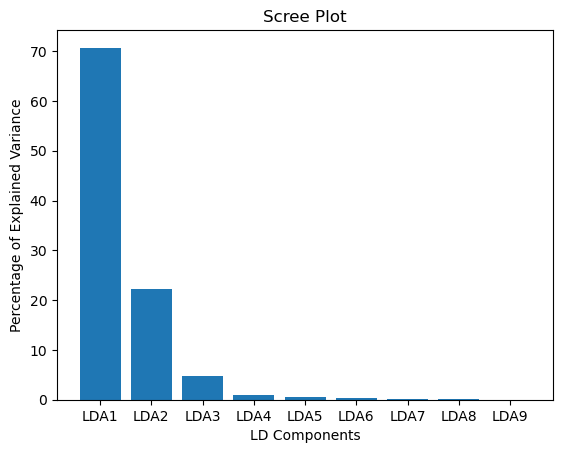

In [21]:
percent_variance_abalone_lda =  np.round(lda_model_abalone.explained_variance_ratio_*100,decimals = 1)
lables = ['LDA' + str(x) for x in range(1,len(percent_variance_abalone_lda)+1)]
plt.bar(x = range(1,len(percent_variance_abalone_lda)+1),
        height = percent_variance_abalone_lda, tick_label = lables)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("LD Components")
plt.title('Scree Plot')
plt.show()

In [22]:
percent_variance_abalone_lda

array([70.7, 22.2,  4.7,  0.9,  0.6,  0.3,  0.2,  0.1,  0. ])

In [23]:
col_abalone_lda = []
for i in range(1,n_comp_abalone_LDA+1):
    
    appendcol_abalone_LDA = ("LDA"+ str(i))
    col_abalone_lda.append(appendcol_abalone_LDA)
    
df_LDA_A = pd.DataFrame(lda_results_abalone,columns=col_abalone_lda)
df_LDA_A

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6,LDA7,LDA8,LDA9
0,-0.404236,-0.186239,0.068138,-0.289981,-1.262215,1.110505,-0.811992,-1.245139,0.263612
1,-1.842676,0.357621,0.523172,-0.418122,-1.032183,1.663024,0.022465,-0.567914,-0.780907
2,0.935220,-0.189532,-0.769579,-0.536831,-0.386195,0.905655,0.580981,0.365970,1.332356
3,-0.323331,0.129094,0.110766,-0.614340,-1.831463,0.754131,-1.122993,-0.031672,-0.263452
4,-2.943518,0.578175,-0.247245,-0.142844,0.019338,-0.368762,-0.463277,0.065641,0.347791
...,...,...,...,...,...,...,...,...,...
4172,0.955121,-0.595451,0.317571,-0.793332,-0.987776,-0.422466,1.120718,1.144572,0.573582
4173,0.696883,-0.941542,0.210641,-0.023333,0.300424,0.563307,0.449614,-1.491070,-0.879600
4174,1.077156,-0.470877,0.631518,-0.868792,-0.601322,-0.506248,-0.493660,0.923974,-1.806183
4175,0.933812,-1.508804,0.952501,0.517657,-0.072721,-0.048363,1.115536,0.227029,1.007576


# LDA on Wine

In [24]:
n_comp_wine_lda = len(df_wine_copy['quality'].unique()) - 1
wine_y = df_wine_copy['quality']
X_train_WL,X_test_WL,y_train_WL,y_test_WL = train_test_split(scaled_wine_X, wine_y, test_size=0.2, random_state=0)
lda_model_wine = LDA(n_components=n_comp_wine_lda)
lda_model_train_w = lda_model_wine.fit(X_train_WL,y_train_WL)
lda_model_train_wine = lda_model_wine.fit(X_train_WL,y_train_WL)
lda_results_wine = lda_model_wine.transform(scaled_wine_X)
lda_results_wine

array([[-2.02809074,  0.9002416 ,  0.16570156, -0.42724994, -1.0344061 ,
        -0.61980907],
       [-2.21112099,  1.61682375, -1.22307411,  0.59459209, -0.34283136,
        -2.14744511],
       [-1.9295912 ,  0.99450896, -0.3819933 ,  0.55259679, -0.55518522,
        -1.69747976],
       ...,
       [-1.09978525, -0.73841966,  1.39301614, -0.38315664,  0.03599519,
        -0.98754329],
       [ 1.70095814,  0.7859783 ,  0.41835746,  0.93698457,  0.83410392,
         0.4041546 ],
       [ 1.12368841,  0.13373307,  0.4527013 ,  0.50474918,  0.38853029,
         1.12490907]])

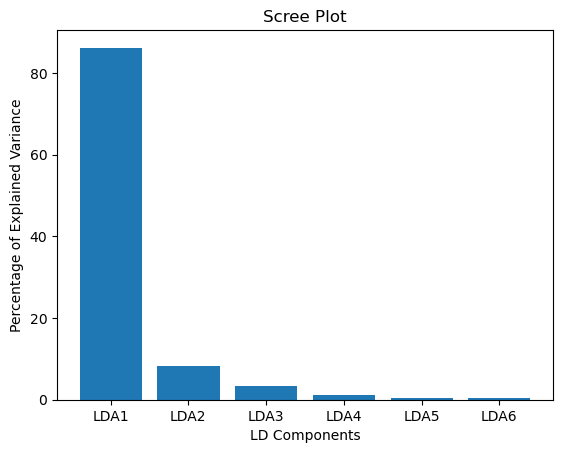

In [25]:
percent_variance_wine_lda =  np.round(lda_model_wine.explained_variance_ratio_*100,decimals = 1)
lables = ['LDA' + str(x) for x in range(1,len(percent_variance_wine_lda)+1)]
plt.bar(x = range(1,len(percent_variance_wine_lda)+1),
        height = percent_variance_wine_lda, tick_label = lables)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("LD Components")
plt.title('Scree Plot')
plt.show()

In [26]:
percent_variance_wine_lda

array([86.2,  8.3,  3.4,  1.2,  0.5,  0.3])

In [27]:
col_wine_lda = []
for i in range(1,n_comp_wine_lda+1):
    
    appendcol_wine_LDA = ("LDA"+ str(i))
    col_wine_lda.append(appendcol_wine_LDA)
    
df_LDA_W = pd.DataFrame(lda_results_wine,columns=col_wine_lda)
df_LDA_W

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6
0,-2.028091,0.900242,0.165702,-0.427250,-1.034406,-0.619809
1,-2.211121,1.616824,-1.223074,0.594592,-0.342831,-2.147445
2,-1.929591,0.994509,-0.381993,0.552597,-0.555185,-1.697480
3,-0.119950,-1.299882,-0.989659,0.474872,-2.707442,1.575485
4,-2.028091,0.900242,0.165702,-0.427250,-1.034406,-0.619809
...,...,...,...,...,...,...
6492,0.891751,0.089679,0.982308,-0.290490,-0.155754,0.105000
6493,-0.552944,-0.286641,-1.140404,-0.415423,0.588375,0.508100
6494,-1.099785,-0.738420,1.393016,-0.383157,0.035995,-0.987543
6495,1.700958,0.785978,0.418357,0.936985,0.834104,0.404155


3. You now want to experimentally find the best reduced dimensionality for the dataset with
respect to how it impacts the accuracy of a classifier.
* Produce a plot that shows accuracy of the kNN classifier on the PCA features using different numbers of dimensions. The accuracy should be listed in increasing order from 2 up to D, the original dimensionality of the dataset.
* For the kNN classifier, you should choose the best one you found from asg1, one of the weighted versions using a normalized dataset.
* Comment briefly on the difference in accuracy from asg1.
* How do the best number of features suggested by the scree plot and this analysis compare?

## ***KNN Classifier for Abalone Dataset***

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### 1. For Abalone Raw Dataset

In [30]:
y = df_abalone_PCA_copy['Rings']
X = Raw_Abalone
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=0)

In [31]:
scaler = MinMaxScaler()
knn_abalone = KNeighborsClassifier(weights= 'distance')
operations = [('scaler',scaler),('knn',knn_abalone)]
pipe = Pipeline(operations)
k_values = list(range(1,100))
param_grid = {'knn__n_neighbors':k_values}
full_classifier_abalone = GridSearchCV(pipe,param_grid,cv =5,scoring='accuracy')

In [32]:
full_classifier_abalone.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [33]:
full_classifier_abalone.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=98, weights='distance'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=98, weights='distance'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 98,
 'knn__p': 2,
 'knn__weights': 'distance'}

In [36]:
classifier=KNeighborsClassifier(n_neighbors=98,weights='distance') 
classifier.fit(X_train, y_train)  

#Predicting the test set result
prediction=classifier.predict(X_test)
print("KNN Accuracy for Abalone Raw dataset --- ",accuracy_score(prediction,y_test)*100)
KNN_Abalone_Raw = np.round(accuracy_score(prediction,y_test)*100,2)

KNN Accuracy for Abalone Raw dataset ---  25.95693779904306


## 2. Abalone PCA - Accuracy Comparison and KNN training

In [37]:
abalone_x = Raw_Abalone
X_train_AK,X_test_AK,y_train_AK,y_test_AK = train_test_split(abalone_x,abalone_y,test_size=0.2,random_state=0)

n_dimension = df_PCA_A.shape[1]
accuracy_A_PCA = []

for i in range(2, n_dimension+1):
    pca = PCA(n_components=i)
    pca.fit(X_train_AK)
    X_train_pca = pca.transform(X_train_AK)
    X_test_pca = pca.transform(X_test_AK)
    
    knn_Ab  = KNeighborsClassifier(n_neighbors=98, weights ='distance')
    knn_Ab.fit(X_train_pca, y_train_AK)
    acc_knn_ab = knn_Ab.score(X_test_pca,y_test_AK)
    accuracy_A_PCA.append(acc_knn_ab)

In [38]:
accuracy_A_PCA

[0.19736842105263158,
 0.2117224880382775,
 0.24043062200956938,
 0.2631578947368421,
 0.2607655502392344,
 0.2619617224880383,
 0.2607655502392344,
 0.2595693779904306]

In [39]:
final_index_A = ['PC'+ str(i) for i in range(2, n_dimension+1) ]
final_A = pd.DataFrame({'PC': final_index_A, 'values' : accuracy_A_PCA})

<AxesSubplot:xlabel='PC Components', ylabel='Accuracy'>

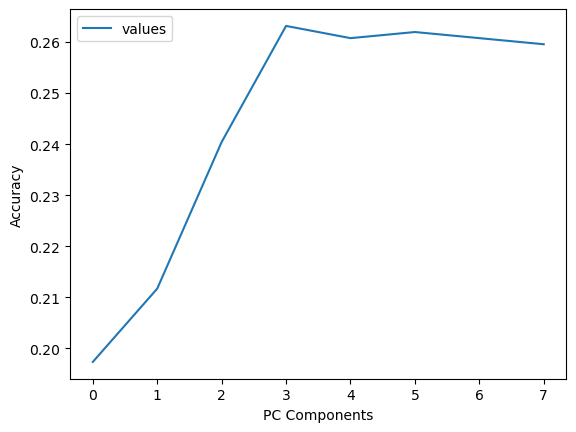

In [41]:
plt.xlabel('PC Components')
plt.ylabel('Accuracy')
sns.lineplot(data = final_A)

*By observing the accuracy plot for PC components, we decided to use the first five principle components.*

**KNN Classifier using Abalone PCA dataset**

In [43]:
X_train_AK,X_test_AK,y_train_AK,y_test_AK = train_test_split(abalone_x,abalone_y,test_size=0.2,random_state=0)
pca = PCA(n_components=5)
pca.fit(X_train_AK)
X_train_pca = pca.transform(X_train_AK)
X_test_pca = pca.transform(X_test_AK)
    
knn_Ab  = KNeighborsClassifier(n_neighbors=98, weights='distance')
knn_Ab.fit(X_train_pca, y_train_AK)
acc_knn_ab = knn_Ab.score(X_test_pca,y_test_AK)
KNN_Abalone_PCA = np.round(acc_knn_ab * 100,2)
KNN_Abalone_PCA
print("KNN Accuracy for Abalone PCA dataset --- ",KNN_Abalone_PCA)

KNN Accuracy for Abalone PCA dataset ---  26.32


## 3. Abalone LDA - Accuracy Comparison and KNN training

In [44]:
X_train_AK,X_test_AK,y_train_AK,y_test_AK = train_test_split(abalone_x,abalone_y,test_size=0.2,random_state=0)

n_dimension = df_LDA_A.shape[1]
accuracy_A_LDA = []

for i in range(2, n_dimension+1):
    lda = LDA(n_components=i)
    lda.fit(X_train_AK,y_train_AK)
    X_train_lda = lda.transform(X_train_AK)
    X_test_lda = lda.transform(X_test_AK)
    
    knn_Ab  = KNeighborsClassifier(n_neighbors=89,weights='distance')
    knn_Ab.fit(X_train_lda, y_train_AK)
    acc_knn_ab = knn_Ab.score(X_test_lda,y_test_AK)
    accuracy_A_LDA.append(acc_knn_ab)
    
accuracy_A_LDA

[0.25239234449760767,
 0.2727272727272727,
 0.2715311004784689,
 0.2619617224880383,
 0.24162679425837322,
 0.2595693779904306,
 0.2452153110047847,
 0.2607655502392344]

In [45]:
final_index_A_LDA = ['LDA'+ str(i) for i in range(2, n_dimension+1) ]
final_A_LDA = pd.DataFrame({'LDA': final_index_A_LDA, 'values' : accuracy_A_LDA})
final_A_LDA

,LDA,values
0,LDA2,0.252392
1,LDA3,0.272727
2,LDA4,0.271531
3,LDA5,0.261962
4,LDA6,0.241627
5,LDA7,0.259569
6,LDA8,0.245215
7,LDA9,0.260766


<AxesSubplot:xlabel='LD Components', ylabel='Accuracy'>

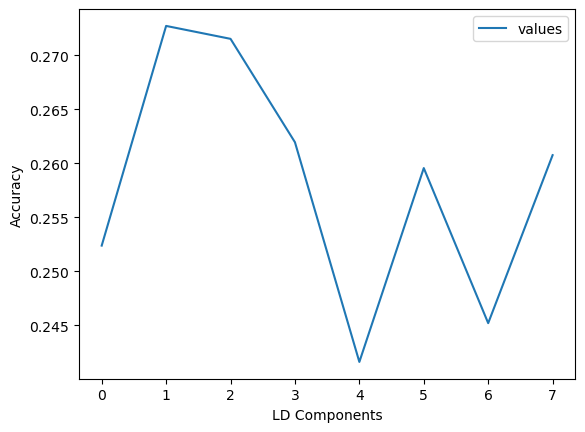

In [47]:
plt.xlabel('LD Components')
plt.ylabel('Accuracy')
sns.lineplot(data = final_A_LDA)

*By observing the accuracy plot for LD components, we decided to use the first three linear discriminants.*

**KNN Classifier using Abalone LDA dataset**

In [48]:
X_train_AK,X_test_AK,y_train_AK,y_test_AK = train_test_split(abalone_x,abalone_y,test_size=0.2,random_state=0)
lda = LDA(n_components=3)
lda.fit(X_train_AK,y_train_AK)
X_train_lda = lda.transform(X_train_AK)
X_test_lda = lda.transform(X_test_AK)
    
knn_Ab  = KNeighborsClassifier(n_neighbors=89,weights='distance')
knn_Ab.fit(X_train_lda, y_train_AK)
acc_knn_ab = knn_Ab.score(X_test_lda,y_test_AK)
KNN_Abalone_LDA = np.round(acc_knn_ab * 100,2)
KNN_Abalone_LDA
print("KNN Accuracy for Abalone PCA dataset --- ",KNN_Abalone_LDA)

KNN Accuracy for Abalone PCA dataset ---  27.27


## ***KNN Classifier for Wine Dataset***

### 1. For Wine Raw Dataset

In [197]:
wine_x =  Raw_wine
wine_y = df_wine_copy['quality']

X_train, X_test, y_train, y_test= train_test_split(wine_x, wine_y, test_size= 0.20, random_state=0)

scaler = MinMaxScaler()
knn = KNeighborsClassifier(weights = 'distance')
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)
k_values = list(range(1,100))
param_grid = {'knn__n_neighbors':k_values}
full_classifier = GridSearchCV(pipe,param_grid,cv =5,scoring='accuracy')

full_classifier.fit(X_train,y_train)

full_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=85, weights='distance'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=85, weights='distance'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 85,
 'knn__p': 2,
 'knn__weights': 'distance'}

In [198]:
classifier=KNeighborsClassifier(n_neighbors=85,weights='distance') 
classifier.fit(X_train, y_train)  

#Predicting the test set result
prediction=classifier.predict(X_test)
print("KNN Accuracy for Wine Raw dataset --- ",accuracy_score(prediction,y_test)*100)
KNN_Wine_Raw = np.round(accuracy_score(prediction,y_test)*100,2)

KNN Accuracy for Wine Raw dataset ---  67.6923076923077


### 2. Wine PCA - Accuracy Comparison and KNN training

In [199]:
X_train_WK,X_test_WK,y_train_WK,y_test_WK = train_test_split(wine_x,wine_y,test_size=0.2,random_state=0)

n_dimension_W = df_PCA_W.shape[1]
accuracy_W_PCA = []

for i in range(2, n_dimension_W+1):
    pca_w = PCA(n_components=i)
    pca_w.fit(X_train_WK)
    X_train_pca_w = pca_w.transform(X_train_WK)
    X_test_pca_w = pca_w.transform(X_test_WK)
    
    knn_W  = KNeighborsClassifier(n_neighbors=98,weights='distance')
    knn_W.fit(X_train_pca_w, y_train_WK)
    acc_knn_W = knn_W.score(X_test_pca_w,y_test_WK)
    accuracy_W_PCA.append(acc_knn_W)
    
accuracy_W_PCA

[0.6346153846153846,
 0.6561538461538462,
 0.6484615384615384,
 0.6684615384615384,
 0.6646153846153846,
 0.6738461538461539,
 0.6823076923076923,
 0.6753846153846154,
 0.6784615384615384,
 0.6776923076923077,
 0.6746153846153846]

In [200]:
final_index_w = ['PC'+ str(i) for i in range(2, n_dimension_W+1) ]
final_w = pd.DataFrame({'PC': final_index_w, 'values' : accuracy_W_PCA})
final_w

,PC,values
0,PC2,0.634615
1,PC3,0.656154
2,PC4,0.648462
3,PC5,0.668462
4,PC6,0.664615
5,PC7,0.673846
6,PC8,0.682308
7,PC9,0.675385
8,PC10,0.678462
9,PC11,0.677692


<AxesSubplot:xlabel='PC Components', ylabel='Accuracy'>

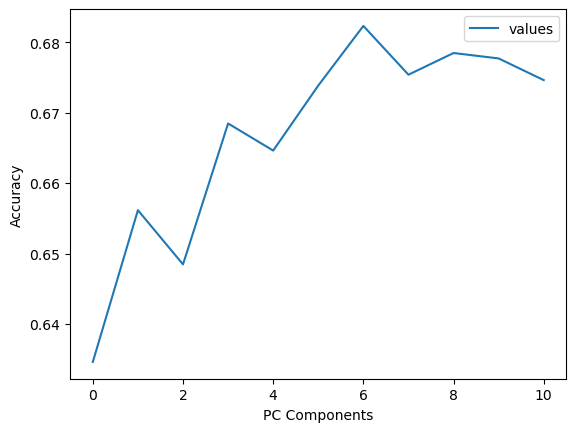

In [201]:
plt.xlabel('PC Components')
plt.ylabel('Accuracy')
sns.lineplot(data = final_w)

*By observing the accuracy plot for PC components, we decided to use the first eight principle components.*

**KNN Classifier using Wine PCA dataset**

In [202]:
X_train_WK,X_test_WK,y_train_WK,y_test_WK = train_test_split(wine_x,wine_y,test_size=0.2,random_state=0)
pca_w = PCA(n_components=8)
pca_w.fit(X_train_WK)
X_train_pca_w = pca_w.transform(X_train_WK)
X_test_pca_w = pca_w.transform(X_test_WK)
    
knn_W  = KNeighborsClassifier(n_neighbors=85,weights='distance')
knn_W.fit(X_train_pca_w, y_train_WK)
acc_knn_W = knn_W.score(X_test_pca_w,y_test_WK)

KNN_Wine_PCA = np.round(acc_knn_W * 100,2)
print("KNN Accuracy for Wine PCA dataset --- ", KNN_Wine_PCA)

KNN Accuracy for Wine PCA dataset ---  67.62


### 3. Wine LDA - Accuracy Comparison and KNN training

In [203]:
X_train_WK,X_test_WK,y_train_WK,y_test_WK = train_test_split(wine_x,wine_y,test_size=0.2,random_state=0)

n_dimension_W = df_LDA_W.shape[1]
accuracy_W_LDA = []

for i in range(2, n_dimension_W+1):
    lda_W = LDA(n_components=i)
    lda_W.fit(X_train_WK,y_train_WK)
    X_train_lda_W = lda_W.transform(X_train_WK)
    X_test_lda_W = lda_W.transform(X_test_WK)
    
    knn_W  = KNeighborsClassifier(n_neighbors=85,weights='distance')
    knn_W.fit(X_train_lda_W, y_train_WK)
    acc_knn_W = knn_W.score(X_test_lda_W,y_test_WK)
    accuracy_W_LDA.append(acc_knn_W)
    
accuracy_W_LDA

[0.6446153846153846,
 0.6546153846153846,
 0.6607692307692308,
 0.6576923076923077,
 0.6561538461538462]

In [204]:
final_index_W_LDA = ['LDA'+ str(i) for i in range(2, n_dimension_W+1) ]
final_W_LDA = pd.DataFrame({'LDA': final_index_W_LDA, 'values' : accuracy_W_LDA})
final_W_LDA

,LDA,values
0,LDA2,0.644615
1,LDA3,0.654615
2,LDA4,0.660769
3,LDA5,0.657692
4,LDA6,0.656154


<AxesSubplot:xlabel='LD Components', ylabel='Accuracy'>

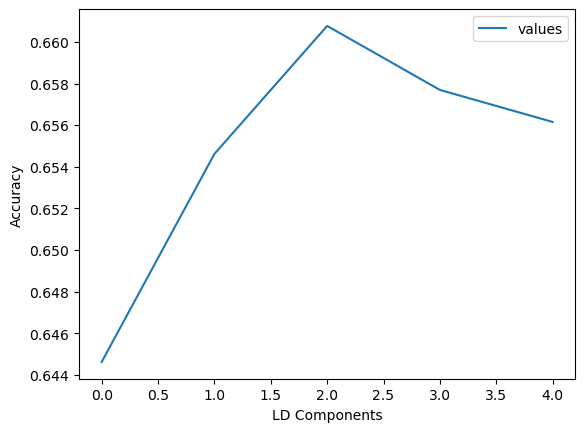

In [205]:
plt.xlabel('LD Components')
plt.ylabel('Accuracy')
sns.lineplot(data = final_W_LDA)

*By observing the accuracy plot for LD components, we decided to use the first four linear discriminants.*

**KNN Classifier using Wine LDA dataset**

In [206]:
lda_W = LDA(n_components=4)
lda_W.fit(X_train_WK,y_train_WK)
X_train_lda_W = lda_W.transform(X_train_WK)
X_test_lda_W = lda_W.transform(X_test_WK)
    
knn_W  = KNeighborsClassifier(n_neighbors=85,weights='distance')
knn_W.fit(X_train_lda_W, y_train_WK)
acc_knn_W = knn_W.score(X_test_lda_W,y_test_WK)
KNN_Wine_LDA = np.round(acc_knn_W * 100,2)
print("KNN Accuracy for Wine LDA dataset --- ", KNN_Wine_LDA)

KNN Accuracy for Wine LDA dataset ---  66.08


4. Try using the t-SNE method to visualize the datasets by producing a 2D plot, comment on any useful patterns that this shows.

## **tSNE - PCA - Abalone**

In [70]:
PCA_Abalone_df = df_PCA_A.drop(['PC6','PC7','PC8','PC9'],axis=1)
PCA_Wine_df = df_PCA_W.drop(['PC9','PC10','PC11','PC12'],axis=1)
LDA_Abalone_df = df_LDA_A.drop(['LDA4','LDA5','LDA6','LDA7','LDA8','LDA9'],axis=1)
LDA_Wine_df =  df_LDA_W.drop(['LDA5','LDA6'],axis=1)

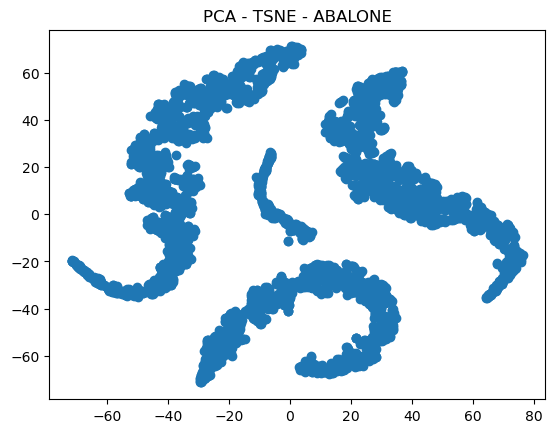

In [71]:
from sklearn.manifold import TSNE

tsne_pca_A = TSNE(n_components=2,random_state=0)
X_pca_tsne_A = tsne_pca_A.fit_transform(PCA_Abalone_df)

plt.scatter(X_pca_tsne_A[:,0], X_pca_tsne_A[:,1],cmap='viridis')
plt.title("PCA - TSNE - ABALONE")
plt.show()

## **tSNE - LDA - ABALONE**

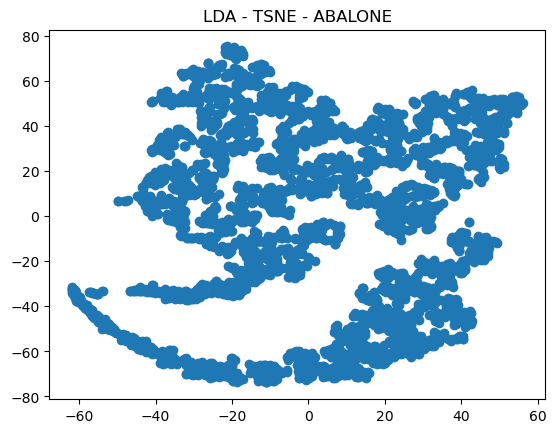

In [73]:
tsne_lda_A = TSNE(n_components=2,random_state=0)
X_lda_tsne_A = tsne_lda_A.fit_transform(LDA_Abalone_df)

plt.scatter(X_lda_tsne_A[:,0], X_lda_tsne_A[:,1],cmap='viridis')
plt.title("LDA - TSNE - ABALONE")
plt.show()

## **tSNE - PCA - Wine**

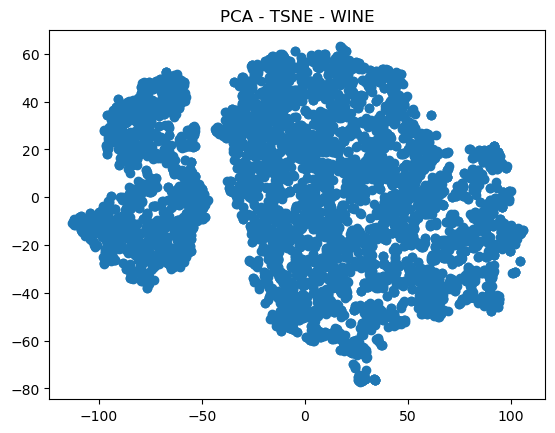

In [72]:
tsne_pca_W = TSNE(n_components=2,random_state=0)
X_pca_tsne_W = tsne_pca_W.fit_transform(PCA_Wine_df)

plt.scatter(X_pca_tsne_W[:,0], X_pca_tsne_W[:,1],cmap='viridis')
plt.title("PCA - TSNE - WINE")
plt.show()

## **tSNE - LDA - WINE**

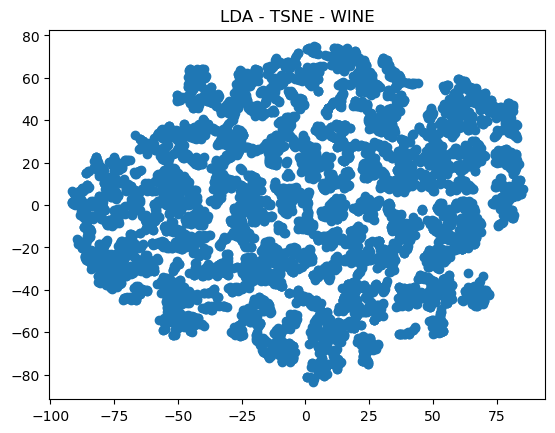

In [74]:
tsne_lda_W = TSNE(n_components=2,random_state=0)
X_lda_tsne_W = tsne_lda_W.fit_transform(LDA_Wine_df)

plt.scatter(X_lda_tsne_W[:,0], X_lda_tsne_W[:,1],cmap='viridis')
plt.title("LDA - TSNE - WINE")
plt.show()

## **Summary accuracy scores for kNN on all six datasets**

In [208]:
final_KNN = pd.DataFrame([{'Raw' : KNN_Abalone_Raw, 'PCA': KNN_Abalone_PCA, 'LDA': KNN_Abalone_LDA},
                         {'Raw' : KNN_Wine_Raw, 'PCA': KNN_Wine_PCA, 'LDA': KNN_Wine_LDA}])
final_KNN.index = ['Abalone','Wine']
final_KNN

,Raw,PCA,LDA
Abalone,25.96,26.32,27.27
Wine,67.69,67.62,66.08


# **2. Naive Bayes Classifier**

Now you will classify the two datasets using the Naive Bayes Classifier. There are a number
of these available, for our datasets, the Multinomial Naive Bayes and Complement Naive
Bayes forms seem most appropriate, so we will experiment with those.
1. Use 5-fold cross validation to compare both versions of Naive Bayes against your previous
best results from kNN. Do this on all 6 of your datasets.
2. You can have some analysis here or plot to highlight any interesting issues. There are also
variants of Naive Bayes you may want to explore.
3. Produce a table comparing the accuracies on the different datasets.
Include summary accuracy scores on all six datasets in the table in the last question.


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB,ComplementNB

## ***Multinomial Naive Bayes***

In [77]:
#Abalone
X_trainA, X_testA, y_trainA, y_testA = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=0)
X_trainAP, X_testAP, y_trainAP, y_testAP = train_test_split(PCA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
X_trainAL, X_testAL, y_trainAL, y_testAL = train_test_split(LDA_Abalone_df, abalone_y, test_size=0.2, random_state=0)

#Wine
X_trainW, X_testW, y_trainW, y_testW = train_test_split(wine_x, wine_y, test_size=0.2, random_state=0)
X_trainWP, X_testWP, y_trainWP, y_testWP = train_test_split(PCA_Wine_df, wine_y, test_size=0.2, random_state=0)
X_trainWL, X_testWL, y_trainWL, y_testWL = train_test_split(LDA_Wine_df, wine_y, test_size=0.2, random_state=0)

mnb_pipe = Pipeline([('scaler',MinMaxScaler()),('mnb', MultinomialNB())])

mnb_pipe.fit(X_trainA,y_trainA)
MNB_Abalone_Raw = np.round((mnb_pipe.score(X_testA,y_testA)) * 100,2)
print("Accuracy score for Abalone Raw: ", MNB_Abalone_Raw)
mnb_pipe.fit(X_trainAP,y_trainAP)
MNB_Abalone_PCA = np.round((mnb_pipe.score(X_testAP,y_testAP)) * 100,2)
print("Accuracy score for Abalone PCA: ", MNB_Abalone_PCA)
mnb_pipe.fit(X_trainAL,y_trainAL)
MNB_Abalone_LDA = np.round((mnb_pipe.score(X_testAL,y_testAL)) * 100,2)
print("Accuracy score for Abalone LDA: ", MNB_Abalone_LDA)

mnb_pipe.fit(X_trainW,y_trainW)
MNB_Wine_Raw = np.round((mnb_pipe.score(X_testW,y_testW)) * 100,2)
print("Accuracy score for Wine Raw: ", MNB_Wine_Raw)
mnb_pipe.fit(X_trainWP,y_trainWP)
MNB_Wine_PCA = np.round((mnb_pipe.score(X_testWP,y_testWP)) * 100,2)
print("Accuracy score for Wine PCA: ", MNB_Wine_PCA)
mnb_pipe.fit(X_trainWL,y_trainWL)
MNB_Wine_LDA = np.round((mnb_pipe.score(X_testWL,y_testWL)) * 100,2)
print("Accuracy score for Wine LDA: ", MNB_Wine_LDA)

print("Cross-validation score for Abalone Raw: ",np.round(cross_val_score(mnb_pipe,X_trainA,y_trainA,cv=5).mean() * 100,2))
print("Cross-validation score for Wine Raw: ",np.round(cross_val_score(mnb_pipe,X_trainW,y_trainW,cv=5).mean() * 100,2))
print("Cross-validation score for Abalone PCA: ",np.round(cross_val_score(mnb_pipe,X_trainAP,y_trainAP,cv=5).mean() * 100,2))
print("Cross-validation score for Wine PCA: ",np.round(cross_val_score(mnb_pipe,X_trainWP,y_trainWP,cv=5).mean() * 100,2))
print("Cross-validation score for Abalone LDA: ",np.round(cross_val_score(mnb_pipe,X_trainAL,y_trainAL,cv=5).mean() * 100,2))
print("Cross-validation score for Wine LDA: ",np.round(cross_val_score(mnb_pipe,X_trainWL,y_trainWL,cv=5).mean() * 100,2))

Accuracy score for Abalone Raw:  17.94
Accuracy score for Abalone PCA:  15.19
Accuracy score for Abalone LDA:  15.19
Accuracy score for Wine Raw:  47.77
Accuracy score for Wine PCA:  44.54
Accuracy score for Wine LDA:  44.54
Cross-validation score for Abalone Raw:  20.14
Cross-validation score for Wine Raw:  47.51
Cross-validation score for Abalone PCA:  16.82
Cross-validation score for Wine PCA:  43.45
Cross-validation score for Abalone LDA:  16.82
Cross-validation score for Wine LDA:  43.43


### **Summary accuracy scores for Multinomial Naive Bayes on all six datasets**

In [79]:
final_mnb = pd.DataFrame([{'Raw' : MNB_Abalone_Raw, 'PCA': MNB_Abalone_PCA, 'LDA': MNB_Abalone_LDA},
                         {'Raw' : MNB_Wine_Raw, 'PCA': MNB_Wine_PCA, 'LDA': MNB_Wine_LDA}])
final_mnb.index = ['Abalone','Wine']
final_mnb

,Raw,PCA,LDA
Abalone,17.94,15.19,15.19
Wine,47.77,44.54,44.54


## ***Complement Naive Bayes***

In [78]:
cnb_pipe = Pipeline([('scaler',MinMaxScaler()),('cnb', ComplementNB())])

cnb_pipe.fit(X_trainA,y_trainA)
CNB_Abalone_Raw = np.round((cnb_pipe.score(X_testA,y_testA)) * 100,2)
print("Accuracy score for Abalone Raw: ", CNB_Abalone_Raw)
cnb_pipe.fit(X_trainAP,y_trainAP)
CNB_Abalone_PCA = np.round((cnb_pipe.score(X_testAP,y_testAP)) * 100,2)
print("Accuracy score for Abalone PCA: ", CNB_Abalone_PCA)
cnb_pipe.fit(X_trainAL,y_trainAL)
CNB_Abalone_LDA = np.round((cnb_pipe.score(X_testAL,y_testAL)) * 100,2)
print("Accuracy score for Abalone LDA: ", CNB_Abalone_LDA)

cnb_pipe.fit(X_trainW,y_trainW)
CNB_Wine_Raw = np.round((cnb_pipe.score(X_testW,y_testW)) * 100,2)
print("Accuracy score for Wine Raw: ", CNB_Wine_Raw)
cnb_pipe.fit(X_trainWP,y_trainWP)
CNB_Wine_PCA = np.round((cnb_pipe.score(X_testWP,y_testWP)) * 100,2)
print("Accuracy score for Wine PCA: ", CNB_Wine_PCA)
cnb_pipe.fit(X_trainWL,y_trainWL)
CNB_Wine_LDA = np.round((cnb_pipe.score(X_testWL,y_testWL)) * 100,2)
print("Accuracy score for Wine LDA: ", CNB_Wine_LDA)

print("Cross-validation score for Abalone Raw: ",np.round(cross_val_score(cnb_pipe,X_trainA,y_trainA,cv=5).mean() * 100,2))
print("Cross-validation score for Wine Raw: ",np.round(cross_val_score(cnb_pipe,X_trainW,y_trainW,cv=5).mean() * 100,2))
print("Cross-validation score for Abalone PCA: ",np.round(cross_val_score(cnb_pipe,X_trainAP,y_trainAP,cv=5).mean() * 100,2))
print("Cross-validation score for Wine PCA: ",np.round(cross_val_score(cnb_pipe,X_trainWP,y_trainWP,cv=5).mean() * 100,2))
print("Cross-validation score for Abalone LDA: ",np.round(cross_val_score(cnb_pipe,X_trainAL,y_trainAL,cv=5).mean() * 100,2))
print("Cross-validation score for Wine LDA: ",np.round(cross_val_score(cnb_pipe,X_trainWL,y_trainWL,cv=5).mean() * 100,2))

Accuracy score for Abalone Raw:  18.3
Accuracy score for Abalone PCA:  17.58
Accuracy score for Abalone LDA:  17.22
Accuracy score for Wine Raw:  43.38
Accuracy score for Wine PCA:  43.08
Accuracy score for Wine LDA:  44.46
Cross-validation score for Abalone Raw:  18.26
Cross-validation score for Wine Raw:  43.27
Cross-validation score for Abalone PCA:  18.71
Cross-validation score for Wine PCA:  44.41
Cross-validation score for Abalone LDA:  20.59
Cross-validation score for Wine LDA:  46.41


### **Summary accuracy scores for Complement Naive Bayes on all six datasets**

In [80]:
final_cnb = pd.DataFrame([{'Raw' : CNB_Abalone_Raw, 'PCA': CNB_Abalone_PCA, 'LDA': CNB_Abalone_LDA},
                         {'Raw' : CNB_Wine_Raw, 'PCA': CNB_Wine_PCA, 'LDA': CNB_Wine_LDA}])
final_cnb.index = ['Abalone','Wine']
final_cnb

,Raw,PCA,LDA
Abalone,18.30,17.58,17.22
Wine,43.38,43.08,44.46


# 3 Decision Trees Classifier
You will now do classification on your datasets using Decision Trees. Decision Trees have a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.
1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset.
* the maximum depth of trees
2. Produce a plot showing the mean accuracy vs. relative to tree depth.
3. Interpretability: Use the decision tree library functions, to examine the final resulting splitting rules used for the trees. Do they indicate any interesting patterns that explain the data? Can you find support for this from any analysis you’ve done or see on this dataset previously? For this part, use the original raw feature space only, not the PCA/LDA space. (Why not?)
* Relevant decision tree visualizers, whichever one you use, make sure it is readable in useful way, don’t show information that isn’t helpful:
* tree.plot tree(): the built-in tree plot function for
* sklearn.tree.DecisionTree tree.export graphviz : another simple visualizer
* sklearn.tree.export text : text view of the tree data Include summary accuracy scores on all six datasets in the table in the last question.

In [82]:
from sklearn.tree import DecisionTreeClassifier

## 1. For Abalone Raw

In [83]:
X_train, X_test, y_train, y_test = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,10)}
grid_dt = GridSearchCV(dt,param_grid,cv =5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [84]:
grid_dt.best_params_

{'max_depth': 5}

Text(0, 0.5, 'Mean test Score / Mean Accuracy')

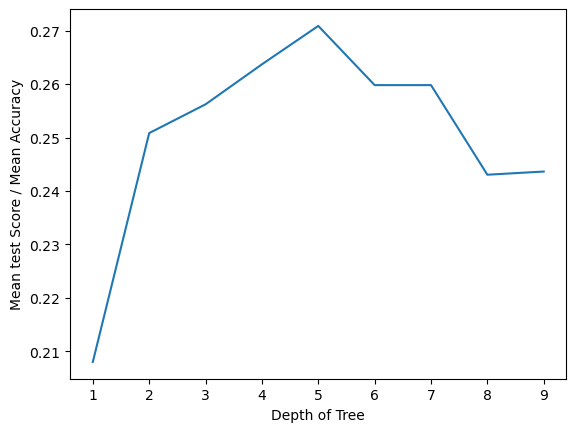

In [85]:
plt.plot(range(1,10),grid_dt.cv_results_['mean_test_score'])
plt.xlabel('Depth of Tree')
plt.ylabel('Mean test Score / Mean Accuracy')

In [89]:
dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])
dt.fit(X_train,y_train)
DTA_Accu_Raw = np.round((dt.score(X_test,y_test)) * 100,2)
print(' Decision Tree Classifier Accuracy on Abalone Raw: ', DTA_Accu_Raw)

 Decision Tree Classifier Accuracy on Abalone Raw:  27.15


## 2. For Abalone PCA

In [90]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,10)}
grid_dt = GridSearchCV(dt,param_grid,cv =5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [91]:
grid_dt.best_params_

{'max_depth': 4}

Text(0, 0.5, 'Mean test Score / Mean Accuracy')

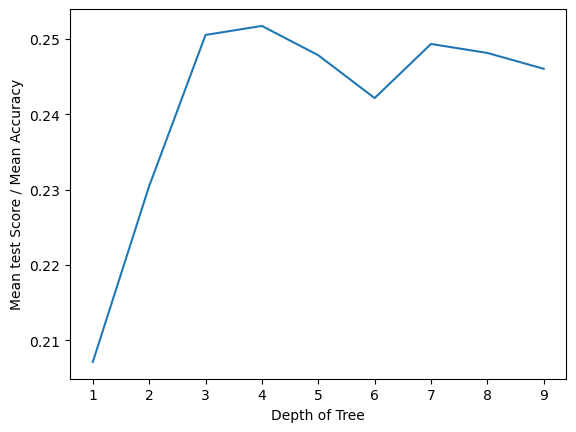

In [92]:
plt.plot(range(1,10),grid_dt.cv_results_['mean_test_score'])
plt.xlabel('Depth of Tree')
plt.ylabel('Mean test Score / Mean Accuracy')

In [94]:
dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])
dt.fit(X_train,y_train)
DTA_Accu_PCA = np.round((dt.score(X_test,y_test)) * 100,2)
print(' Decision Tree Classifier Accuracy on Abalone PCA: ', DTA_Accu_PCA)

 Decision Tree Classifier Accuracy on Abalone PCA:  24.16


## 3. For Abalone LDA

In [95]:
X_train, X_test, y_train, y_test = train_test_split(LDA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,10)}
grid_dt = GridSearchCV(dt,param_grid,cv =5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [96]:
grid_dt.best_params_

{'max_depth': 5}

Text(0, 0.5, 'Mean test Score / Mean Accuracy')

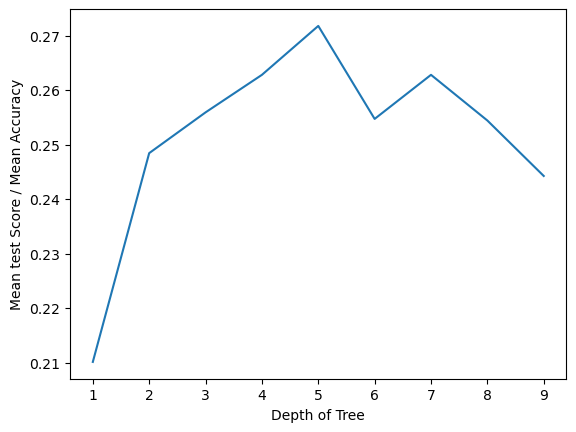

In [97]:
plt.plot(range(1,10),grid_dt.cv_results_['mean_test_score'])
plt.xlabel('Depth of Tree')
plt.ylabel('Mean test Score / Mean Accuracy')

In [98]:
dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])
dt.fit(X_train,y_train)
DTA_Accu_LDA = np.round((dt.score(X_test,y_test)) * 100,2)
print(' Decision Tree Classifier Accuracy on Abalone LDA: ', DTA_Accu_LDA)

 Decision Tree Classifier Accuracy on Abalone LDA:  26.08


## 4. For Wine Raw

In [99]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,10)}
grid_dt = GridSearchCV(dt,param_grid,cv =5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [100]:
grid_dt.best_params_

{'max_depth': 6}

Text(0, 0.5, 'Mean test Score / Mean Accuracy')

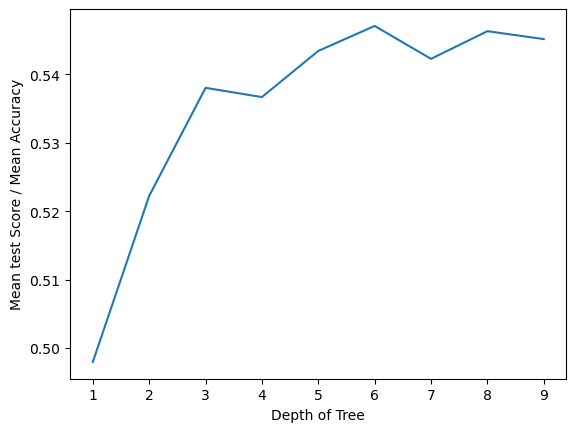

In [102]:
plt.plot(range(1,10),grid_dt.cv_results_['mean_test_score'])
plt.xlabel('Depth of Tree')
plt.ylabel('Mean test Score / Mean Accuracy')

In [103]:
dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])
dt.fit(X_train,y_train)
DTW_Accu_Raw = np.round((dt.score(X_test,y_test)) * 100,2)
print(' Decision Tree Classifier Accuracy on Wine Raw: ', DTW_Accu_Raw)

 Decision Tree Classifier Accuracy on Wine Raw:  53.92


## 5. For Wine PCA

In [104]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Wine_df, wine_y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,10)}
grid_dt = GridSearchCV(dt,param_grid,cv =5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [105]:
grid_dt.best_params_

{'max_depth': 9}

Text(0, 0.5, 'Mean test Score / Mean Accuracy')

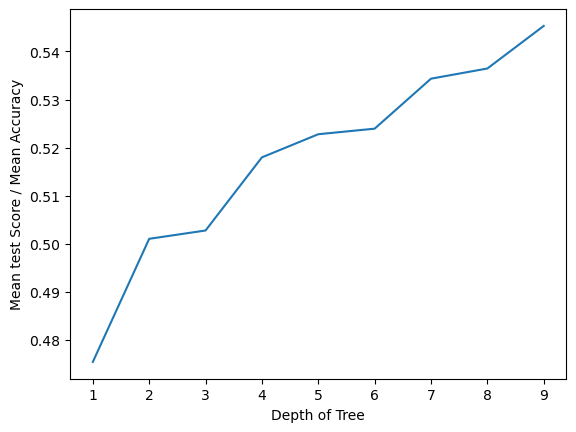

In [106]:
plt.plot(range(1,10),grid_dt.cv_results_['mean_test_score'])
plt.xlabel('Depth of Tree')
plt.ylabel('Mean test Score / Mean Accuracy')

In [107]:
dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])
dt.fit(X_train,y_train)
DTW_Accu_PCA = np.round((dt.score(X_test,y_test)) * 100,2)
print(' Decision Tree Classifier Accuracy on Wine PCA: ', DTW_Accu_PCA)

 Decision Tree Classifier Accuracy on Wine PCA:  54.08


## 6. For Wine LDA

In [108]:
X_train, X_test, y_train, y_test = train_test_split(LDA_Wine_df, wine_y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,10)}
grid_dt = GridSearchCV(dt,param_grid,cv =5)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)})

In [109]:
grid_dt.best_params_

{'max_depth': 8}

Text(0, 0.5, 'Mean test Score / Mean Accuracy')

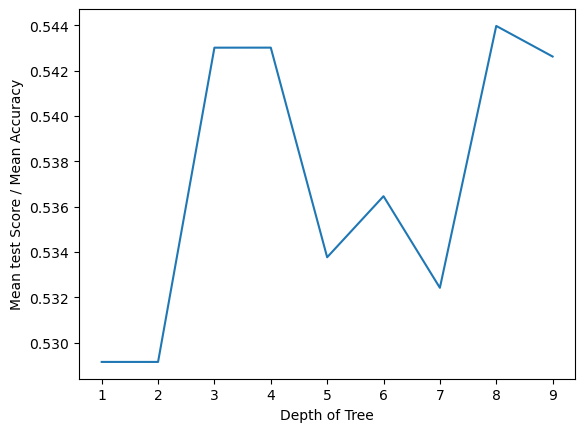

In [110]:
plt.plot(range(1,10),grid_dt.cv_results_['mean_test_score'])
plt.xlabel('Depth of Tree')
plt.ylabel('Mean test Score / Mean Accuracy')

In [111]:
dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])
dt.fit(X_train,y_train)
DTW_Accu_LDA = np.round((dt.score(X_test,y_test)) * 100,2)
print(' Decision Tree Classifier Accuracy on Wine LDA: ', DTW_Accu_LDA)

 Decision Tree Classifier Accuracy on Wine LDA:  52.69


### **Summary accuracy scores for Decision Trees Classifier on all six datasets**

In [112]:
final_DT = pd.DataFrame([{'Raw' : DTA_Accu_Raw, 'PCA': DTA_Accu_PCA, 'LDA': DTA_Accu_LDA},
                         {'Raw' : DTW_Accu_Raw, 'PCA': DTW_Accu_PCA, 'LDA': DTW_Accu_LDA}])
final_DT.index = ['Abalone','Wine']
final_DT

,Raw,PCA,LDA
Abalone,27.15,24.16,26.08
Wine,53.92,54.08,52.69


### INTERPRETABILITY ABALONE

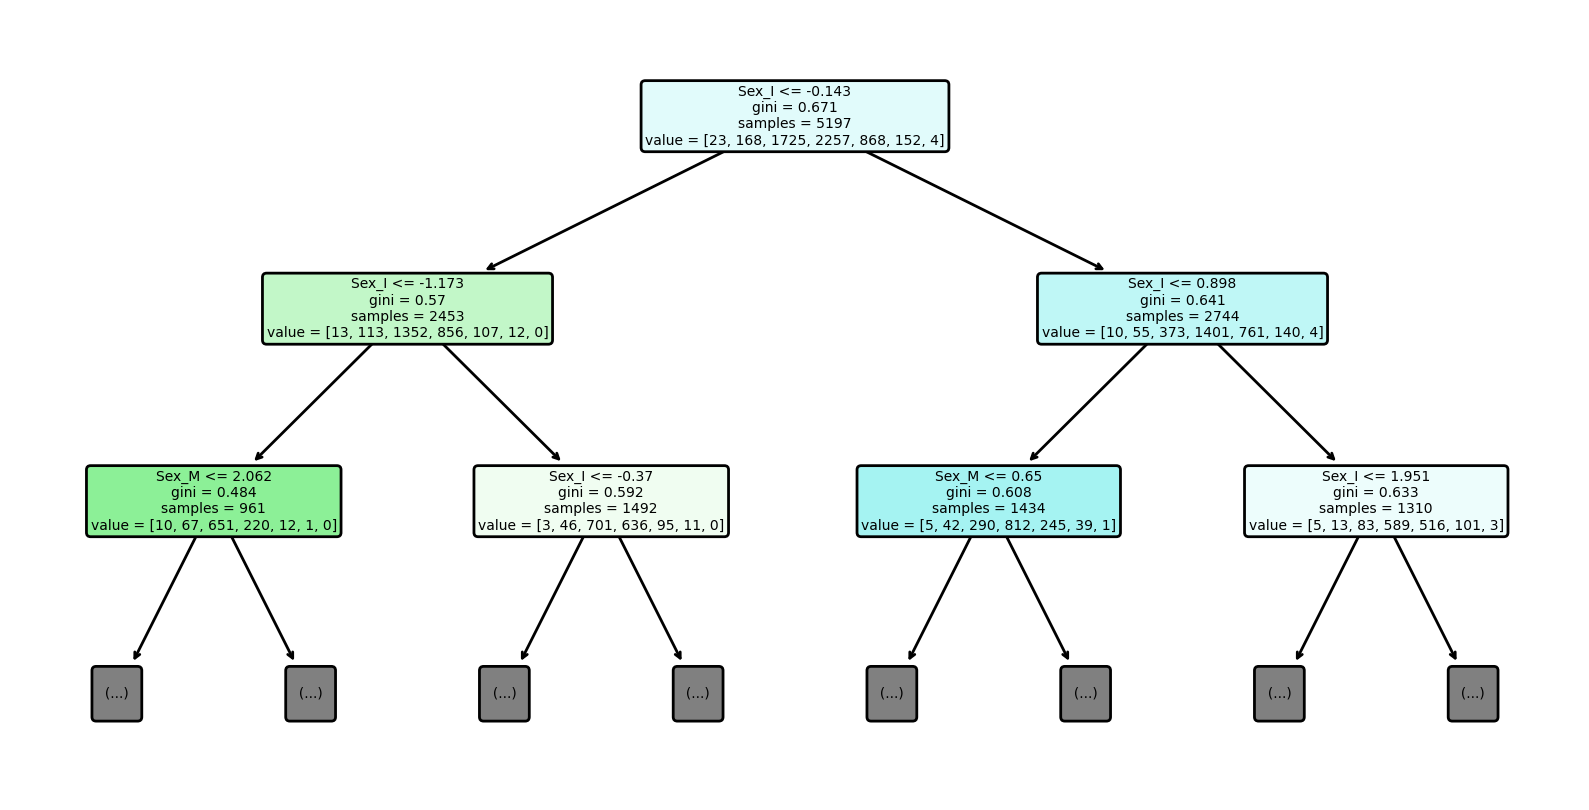

In [113]:
X_train, X_test, y_train, y_test = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=0)
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5),dpi = 200)
plot_tree(dt,feature_names=abalone_x.columns,filled = True,max_depth=2,rounded=True,fontsize=5);

### INTERPRETABILITY WINE

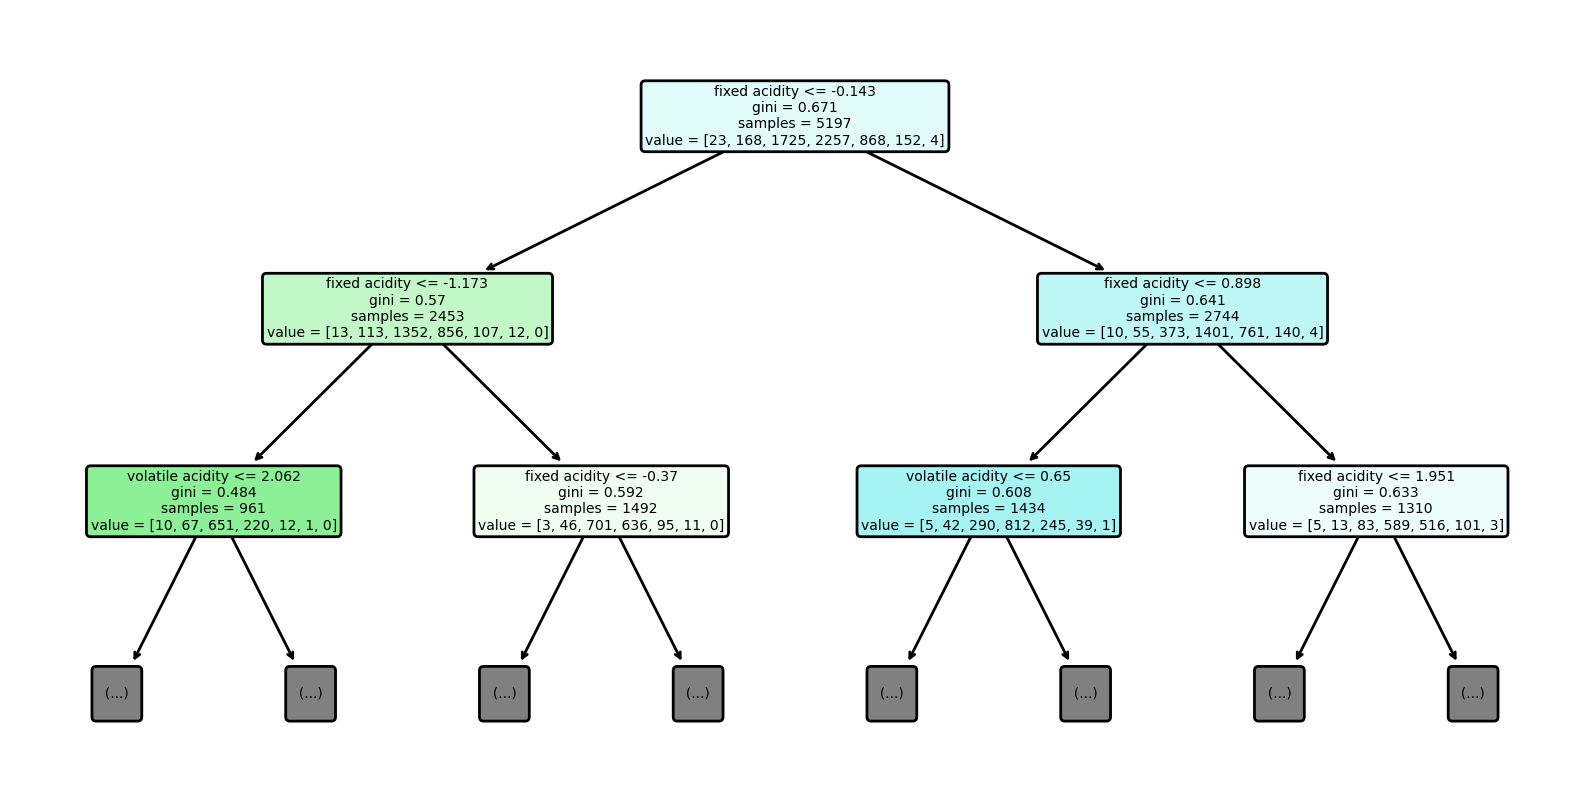

In [114]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, random_state=0)
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5),dpi = 200)
plot_tree(dt,feature_names=wine_x.columns,filled = True,max_depth=2,rounded=True,fontsize=5);

# 4. Random Forest Classifier
You will now do classification on your datasets using Random Forests. Random Forests have a
number of parameters that can effect performance. You can use the GridSearchCV function for this
question.
1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset.
* the maximum depth of trees, you can try values as low as 2 or 3 and as high as needed, decision trees have an upper limit on how deep they can go determine by the size of the dataset.
* the number of trees, try values at regular intervals, you can go as low as 3 and as high as a few hundred trees.
2. Produce a plot showing the mean accuracy vs. the above parameter settings. This can be individually or using a heat plot showing a grid of mean accuracies for different combinations of the two parameters.

In [123]:
from sklearn.ensemble import RandomForestClassifier
import time

## 1. For Abalone Raw

In [116]:
X_train, X_test, y_train, y_test = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
param_grid = {'max_depth': range(2,10),
              'n_estimators': [3, 30, 100, 200]
             }
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [146]:
rf = RandomForestClassifier(max_depth=6,n_estimators = 200)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time()
exec_rf_araw = end_time - start_time
RFA_Accu_Raw = np.round((rf.score(X_test,y_test)) * 100,2)
print('Random Forest Classifier Accuracy on Abalone Raw: ', RFA_Accu_Raw)
print('Random Forest Classifier Execution Time on Abalone Raw: ', exec_rf_araw)

Random Forest Classifier Accuracy on Abalone Raw:  26.56
Random Forest Classifier Execution Time on Abalone Raw:  0.8611912727355957


<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

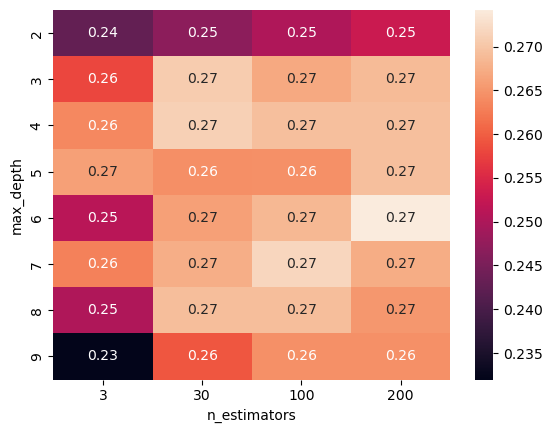

In [145]:
abalone_heatmap = pd.DataFrame(grid_rf.cv_results_['params'])  
abalone_heatmap['accuracy']=grid_rf.cv_results_['mean_test_score']
abalone_heatmap=abalone_heatmap.pivot(index='max_depth',columns='n_estimators',values='accuracy')
sns.heatmap(abalone_heatmap,annot=True)

## 2. For Abalone PCA

In [147]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
param_grid = {'max_depth': range(2,10),
              'n_estimators': [3, 30, 100, 200]
             }
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [148]:
rf = RandomForestClassifier(max_depth=4,n_estimators = 200)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time()
exec_rf_apca = end_time - start_time
RFA_Accu_PCA = np.round((rf.score(X_test,y_test)) * 100,2)
print('Random Forest Classifier Accuracy on Abalone PCA: ', RFA_Accu_PCA)
print('Random Forest Classifier Execution Time on Abalone PCA: ', exec_rf_apca)

Random Forest Classifier Accuracy on Abalone PCA:  26.44
Random Forest Classifier Execution Time on Abalone PCA:  0.8214404582977295


<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

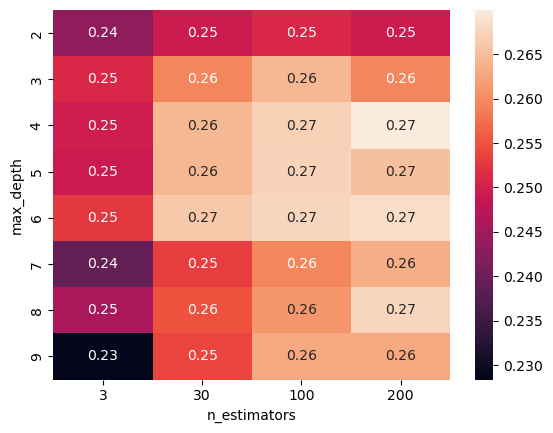

In [149]:
abalone_heatmap = pd.DataFrame(grid_rf.cv_results_['params'])  
abalone_heatmap['accuracy']=grid_rf.cv_results_['mean_test_score']
abalone_heatmap=abalone_heatmap.pivot(index='max_depth',columns='n_estimators',values='accuracy')
sns.heatmap(abalone_heatmap,annot=True)

## 3. For Abalone LDA

In [150]:
X_train, X_test, y_train, y_test = train_test_split(LDA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
param_grid = {'max_depth': range(2,10),
              'n_estimators': [3, 30, 100, 200]
             }
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [151]:
rf = RandomForestClassifier(max_depth=4,n_estimators = 200)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time()
exec_rf_alda = end_time - start_time
RFA_Accu_LDA = np.round((rf.score(X_test,y_test)) * 100,2)
print('Random Forest Classifier Accuracy on Abalone LDA: ', RFA_Accu_LDA)
print('Random Forest Classifier Execution Time on Abalone LDA: ', exec_rf_alda)

Random Forest Classifier Accuracy on Abalone LDA:  27.87
Random Forest Classifier Execution Time on Abalone LDA:  0.7572605609893799


<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

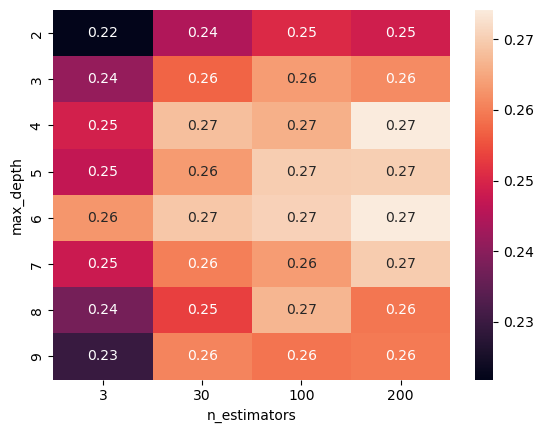

In [152]:
abalone_heatmap = pd.DataFrame(grid_rf.cv_results_['params'])  
abalone_heatmap['accuracy']=grid_rf.cv_results_['mean_test_score']
abalone_heatmap=abalone_heatmap.pivot(index='max_depth',columns='n_estimators',values='accuracy')
sns.heatmap(abalone_heatmap,annot=True)

## 4. For Wine Raw

In [153]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
param_grid = {'max_depth': range(2,10),
              'n_estimators': [3, 30, 100, 200]
             }
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [154]:
rf = RandomForestClassifier(max_depth=9, n_estimators = 200)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time()
exec_rf_wraw = end_time - start_time
RFW_Accu_Raw = np.round((rf.score(X_test,y_test)) * 100,2)
print('Random Forest Classifier Accuracy on Wine Raw: ', RFW_Accu_Raw)
print('Random Forest Classifier Execution Time on Wine Raw: ', exec_rf_wraw)

Random Forest Classifier Accuracy on Wine Raw:  61.46
Random Forest Classifier Execution Time on Wine Raw:  1.4735603332519531


<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

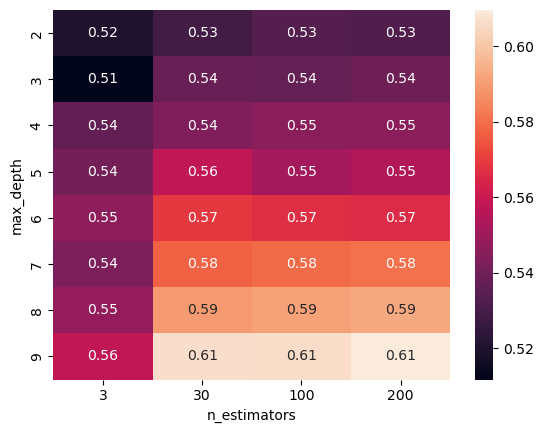

In [155]:
abalone_heatmap = pd.DataFrame(grid_rf.cv_results_['params'])  
abalone_heatmap['accuracy']=grid_rf.cv_results_['mean_test_score']
abalone_heatmap=abalone_heatmap.pivot(index='max_depth',columns='n_estimators',values='accuracy')
sns.heatmap(abalone_heatmap,annot=True)

## 5. For Wine PCA

In [163]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Wine_df, wine_y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
param_grid = {'max_depth': range(2,10),
              'n_estimators': [3, 30, 100, 200]
             }
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [164]:
rf = RandomForestClassifier(max_depth=9, n_estimators = 100)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time()
exec_rf_wpca = end_time - start_time
RFW_Accu_PCA = np.round((rf.score(X_test,y_test)) * 100,2)
print('Random Forest Classifier Accuracy on Wine PCA: ', RFW_Accu_PCA)
print('Random Forest Classifier Execution Time on Wine PCA: ', exec_rf_wpca)

Random Forest Classifier Accuracy on Wine PCA:  60.08
Random Forest Classifier Execution Time on Wine PCA:  0.8221120834350586


<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

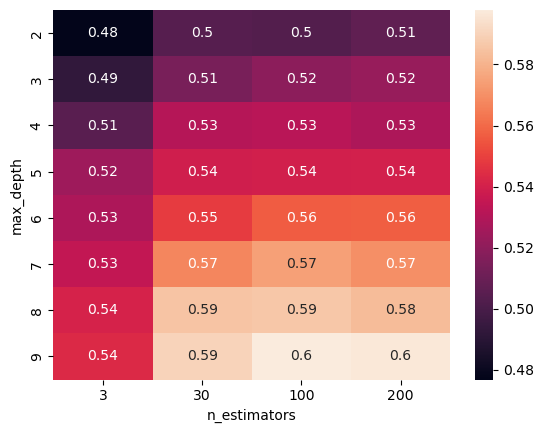

In [165]:
abalone_heatmap = pd.DataFrame(grid_rf.cv_results_['params'])  
abalone_heatmap['accuracy']=grid_rf.cv_results_['mean_test_score']
abalone_heatmap=abalone_heatmap.pivot(index='max_depth',columns='n_estimators',values='accuracy')
sns.heatmap(abalone_heatmap,annot=True)

## 6. For Wine LDA

In [159]:
X_train, X_test, y_train, y_test = train_test_split(LDA_Wine_df, wine_y, test_size=0.2, random_state=0)
rf = RandomForestClassifier()
param_grid = {'max_depth': range(2,10),
              'n_estimators': [3, 30, 100, 200]
             }
grid_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [160]:
rf = RandomForestClassifier(max_depth=9, n_estimators = 100)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time()
exec_rf_wlda = end_time - start_time
RFW_Accu_LDA = np.round((rf.score(X_test,y_test)) * 100,2)
print('Random Forest Classifier Accuracy on Wine LDA: ', RFW_Accu_LDA)
print('Random Forest Classifier Execution Time on Wine LDA: ', exec_rf_wlda)

Random Forest Classifier Accuracy on Wine LDA:  57.62
Random Forest Classifier Execution Time on Wine LDA:  0.8044633865356445


<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

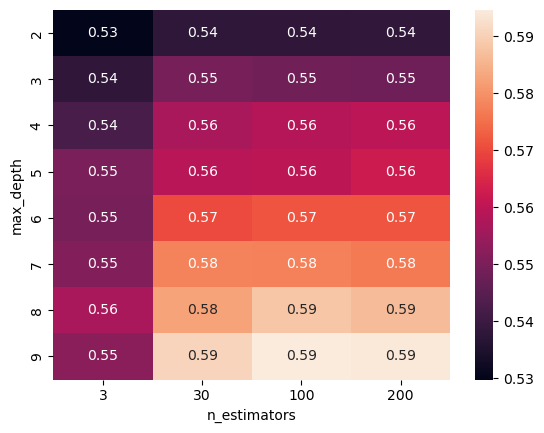

In [161]:
abalone_heatmap = pd.DataFrame(grid_rf.cv_results_['params'])  
abalone_heatmap['accuracy']=grid_rf.cv_results_['mean_test_score']
abalone_heatmap=abalone_heatmap.pivot(index='max_depth',columns='n_estimators',values='accuracy')
sns.heatmap(abalone_heatmap,annot=True)

### **Summary accuracy scores for Random Forest Classifier on all six datasets**

In [166]:
final_RF = pd.DataFrame([{'Raw' : RFA_Accu_Raw, 'PCA': RFA_Accu_PCA, 'LDA': RFA_Accu_LDA},
                         {'Raw' : RFW_Accu_Raw, 'PCA': RFW_Accu_PCA, 'LDA': RFW_Accu_LDA}])
final_RF.index = ['Abalone','Wine']
final_RF

,Raw,PCA,LDA
Abalone,26.56,26.44,27.87
Wine,61.46,60.08,57.62


# 5. Gradient Tree Boosting
You will now do classification on your datasets using Gradient Tree Boosting, on sklearn one is
GradientBoostingClassifier, but you can use other implementations if you prefer. Use your
judgement and experience from the other methods to decide how to train this algorithm and choose
it’s settings. At a minimum, pick some good parameter settings, train the model and show some
analysis of it’s performance and runtime compared to Random Forests.
Include summary accuracy scores on all six datasets in the table in the last question.


In [168]:
from sklearn.ensemble import GradientBoostingClassifier

## 1. For Abalone Raw

In [169]:
X_train, X_test, y_train, y_test = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier()
param_grid = {'max_depth': [2,3,4],
              'n_estimators': [3, 100, 200],
              'learning_rate': [0.01,0.1,1]
             }
grid_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid,cv=5)
grid_gbc.fit(X_train,y_train)
grid_gbc.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}

In [170]:
gbc = GradientBoostingClassifier(max_depth=grid_gbc.best_params_['max_depth'],
                                 n_estimators = grid_gbc.best_params_['n_estimators'],
                                 learning_rate= grid_gbc.best_params_['learning_rate'])
start_time = time.time()
gbc.fit(X_train,y_train)
end_time = time.time()
exec_gbc_araw = end_time - start_time
GBA_Accu_Raw = np.round((gbc.score(X_test,y_test)) * 100,2)
print('Gradient Boosting Classifier Accuracy on Abalone Raw: ', GBA_Accu_Raw)
print('Gradient Boosting Classifier Execution Time on Abalone Raw: ', exec_gbc_araw)

Gradient Boosting Classifier Accuracy on Abalone Raw:  26.2
Gradient Boosting Classifier Execution Time on Abalone Raw:  24.352917432785034


## 2. For Abalone PCA

In [171]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier()
param_grid = {'max_depth': [2,3,4],
              'n_estimators': [3, 100, 200],
              'learning_rate': [0.01,0.1]
             }
grid_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid,cv=5)
grid_gbc.fit(X_train,y_train)
grid_gbc.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}

In [172]:
gbc = GradientBoostingClassifier(max_depth=grid_gbc.best_params_['max_depth'],
                                 n_estimators = grid_gbc.best_params_['n_estimators'],
                                 learning_rate= grid_gbc.best_params_['learning_rate'])
start_time = time.time()
gbc.fit(X_train,y_train)
end_time = time.time()
exec_gbc_apca = end_time - start_time
GBA_Accu_PCA = np.round((gbc.score(X_test,y_test)) * 100,2)
print('Gradient Boosting Classifier Accuracy on Abalone PCA: ', GBA_Accu_PCA)
print('Gradient Boosting Classifier Execution Time on Abalone PCA: ', exec_gbc_apca)

Gradient Boosting Classifier Accuracy on Abalone PCA:  27.27
Gradient Boosting Classifier Execution Time on Abalone PCA:  26.31264305114746


## 3. For Abalone LDA

In [173]:
X_train, X_test, y_train, y_test = train_test_split(LDA_Abalone_df, abalone_y, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier()
param_grid = {'max_depth': [2,3],
              'n_estimators': [3, 100, 200],
              'learning_rate': [0.01,0.1]
             }
grid_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid,cv=5)
grid_gbc.fit(X_train,y_train)
grid_gbc.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}

In [175]:
gbc = GradientBoostingClassifier(max_depth=grid_gbc.best_params_['max_depth'],
                                 n_estimators = grid_gbc.best_params_['n_estimators'],
                                 learning_rate= grid_gbc.best_params_['learning_rate'])
start_time = time.time()
gbc.fit(X_train,y_train)
end_time = time.time()
exec_gbc_alda = end_time - start_time
GBA_Accu_LDA = np.round((gbc.score(X_test,y_test)) * 100,2)
print('Gradient Boosting Classifier Accuracy on Abalone LDA: ', GBA_Accu_LDA)
print('Gradient Boosting Classifier Execution Time on Abalone LDA: ', exec_gbc_alda)

Gradient Boosting Classifier Accuracy on Abalone LDA:  27.63
Gradient Boosting Classifier Execution Time on Abalone LDA:  19.992302894592285


## 4. For Wine Raw

In [176]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier()
grid_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid,cv=5)
grid_gbc.fit(X_train,y_train)
grid_gbc.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [177]:
gbc = GradientBoostingClassifier(max_depth=grid_gbc.best_params_['max_depth'],
                                 n_estimators = grid_gbc.best_params_['n_estimators'],
                                 learning_rate= grid_gbc.best_params_['learning_rate'])
start_time = time.time()
gbc.fit(X_train,y_train)
end_time = time.time()
exec_gbc_wraw = end_time - start_time
GBW_Accu_Raw = np.round((gbc.score(X_test,y_test)) * 100,2)
print('Gradient Boosting Classifier Accuracy on Wine Raw: ', GBW_Accu_Raw)
print('Gradient Boosting Classifier Execution Time on Wine Raw: ', exec_gbc_wraw)

Gradient Boosting Classifier Accuracy on Wine Raw:  60.62
Gradient Boosting Classifier Execution Time on Wine Raw:  13.210723638534546


## 5. For Wine PCA

In [178]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Wine_df, wine_y, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier()
grid_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid,cv=5)
grid_gbc.fit(X_train,y_train)
grid_gbc.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [179]:
gbc = GradientBoostingClassifier(max_depth=grid_gbc.best_params_['max_depth'],
                                 n_estimators = grid_gbc.best_params_['n_estimators'],
                                 learning_rate= grid_gbc.best_params_['learning_rate'])
start_time = time.time()
gbc.fit(X_train,y_train)
end_time = time.time()
exec_gbc_wpca = end_time - start_time
GBW_Accu_PCA = np.round((gbc.score(X_test,y_test)) * 100,2)
print('Gradient Boosting Classifier Accuracy on Wine PCA: ', GBW_Accu_PCA)
print('Gradient Boosting Classifier Execution Time on Wine PCA: ', exec_gbc_wpca)

Gradient Boosting Classifier Accuracy on Wine PCA:  57.46
Gradient Boosting Classifier Execution Time on Wine PCA:  18.321402072906494


## 6. For Wine LDA

In [180]:
X_train, X_test, y_train, y_test = train_test_split(LDA_Wine_df, wine_y, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier()
grid_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid,cv=5)
grid_gbc.fit(X_train,y_train)
grid_gbc.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [181]:
gbc = GradientBoostingClassifier(max_depth=grid_gbc.best_params_['max_depth'],
                                 n_estimators = grid_gbc.best_params_['n_estimators'],
                                 learning_rate= grid_gbc.best_params_['learning_rate'])
start_time = time.time()
gbc.fit(X_train,y_train)
end_time = time.time()
exec_gbc_wlda = end_time - start_time
GBW_Accu_LDA = np.round((gbc.score(X_test,y_test)) * 100,2)
print('Gradient Boosting Classifier Accuracy on Wine LDA: ', GBW_Accu_LDA)
print('Gradient Boosting Classifier Execution Time on Wine LDA: ', exec_gbc_wlda)

Gradient Boosting Classifier Accuracy on Wine LDA:  56.46
Gradient Boosting Classifier Execution Time on Wine LDA:  10.824400424957275


### **Summary accuracy scores for Gradient Boosting Classifier on all six datasets**

In [182]:
final_GB = pd.DataFrame([{'Raw' : GBA_Accu_Raw, 'PCA': GBA_Accu_PCA, 'LDA': GBA_Accu_LDA},
                         {'Raw' : GBW_Accu_Raw, 'PCA': GBW_Accu_PCA, 'LDA': GBW_Accu_LDA}])
final_GB.index = ['Abalone','Wine']
final_GB

,Raw,PCA,LDA
Abalone,26.20,27.27,27.63
Wine,60.62,57.46,56.46


### *Execution time comparison between Random Forest and Gradient Boosting*

In [188]:
exec_time = pd.DataFrame([{'Raw' : exec_rf_araw, 'PCA': exec_rf_apca, 'LDA': exec_rf_alda},
                         {'Raw' : exec_rf_wraw, 'PCA': exec_rf_wpca, 'LDA': exec_rf_wlda},
                          {'Raw' : exec_gbc_araw, 'PCA': exec_gbc_apca, 'LDA': exec_gbc_alda},
                          {'Raw' : exec_gbc_wraw, 'PCA': exec_gbc_wpca, 'LDA': exec_gbc_wlda}])
exec_time.index = ['Random Forest - Abalone','Random Forest - Wine', 'Gradient Boosting - Abalone','Gradient Boosting - Wine']
print('Execution time comparison:')
exec_time

Execution time comparison:


,Raw,PCA,LDA
Random Forest - Abalone,0.861191,0.821440,0.757261
Random Forest - Wine,1.473560,0.822112,0.804463
Gradient Boosting - Abalone,24.352917,26.312643,19.992303
Gradient Boosting - Wine,13.210724,18.321402,10.824400


# Final Comparison

In [215]:
results_df = pd.concat([final_KNN,final_mnb,final_cnb,final_DT,final_GB,final_RF], axis =0)
Result_wine = results_df.loc['Wine']
Result_abalone = results_df.loc['Abalone']

In [216]:
Result_wine['Algorithms'] = ['KNN','Multinomial Naive Bayes','Complement Naive Bayes',
                        'Decision Trees','Random Forest','Gradient Boosting']
Result_wine['Settings'] = ['KNN = 85',
                      'Default',
                      'Default',
                      'Max_Depth(Raw,PCA,LDA) = (6,9,8)',
                      'Max_Depth(Raw,PCA,LDA) = (9,9,9), N_Estimators(Raw,PCA,LDA) = (200,100,100)',
                      'Max_Depth(Raw,PCA,LDA) = (3,3,3), N_Estimators(Raw,PCA,LDA) = (200,200,200), Learning Rate(Raw,PCA,LDA) = (0.1,0.1,0.1)']
Result_abalone['Algorithms'] = ['KNN','Multinomial Naive Bayes','Complement Naive Bayes',
                        'Decision Trees','Random Forest','Gradient Boosting']
Result_abalone['Settings'] = ['KNN = 98',
                      'Default',
                      'Default',
                      'Max_Depth(Raw,PCA,LDA) = (5,4,5)',
                      'Max_Depth(Raw,PCA,LDA) = (6,4,4), N_Estimators(Raw,PCA,LDA) = (200,200,200)',
                      'Max_Depth(Raw,PCA,LDA) = (2,2,2), N_Estimators(Raw,PCA,LDA) = (200,200,200), Learning Rate(Raw,PCA,LDA) = (0.01,0.01,0.01)']

In [217]:
Result_wine = Result_wine.reindex(columns=['Algorithms','Settings','Raw','PCA','LDA'])
Result_abalone = Result_abalone.reindex(columns=['Algorithms','Settings','Raw','PCA','LDA'])
Result_wine = Result_wine.rename(columns = {'PCA': 'PCA (components = 8)','LDA': 'LDA (components = 4)'})
Result_abalone = Result_abalone.rename(columns = {'PCA': 'PCA (components = 5)','LDA': 'LDA (components = 3)'})

In [218]:
Result_abalone

,Algorithms,Settings,Raw,PCA (components = 5),LDA (components = 3)
Abalone,KNN,KNN = 98,25.96,26.32,27.27
Abalone,Multinomial Naive Bayes,Default,17.94,15.19,15.19
Abalone,Complement Naive Bayes,Default,18.30,17.58,17.22
Abalone,Decision Trees,"Max_Depth(Raw,PCA,LDA) = (5,4,5)",27.15,24.16,26.08
Abalone,Random Forest,"Max_Depth(Raw,PCA,LDA) = (6,4,4), N_Estimators...",26.20,27.27,27.63
Abalone,Gradient Boosting,"Max_Depth(Raw,PCA,LDA) = (2,2,2), N_Estimators...",26.56,26.44,27.87


In [219]:
Result_wine

,Algorithms,Settings,Raw,PCA (components = 8),LDA (components = 4)
Wine,KNN,KNN = 85,67.69,67.62,66.08
Wine,Multinomial Naive Bayes,Default,47.77,44.54,44.54
Wine,Complement Naive Bayes,Default,43.38,43.08,44.46
Wine,Decision Trees,"Max_Depth(Raw,PCA,LDA) = (6,9,8)",53.92,54.08,52.69
Wine,Random Forest,"Max_Depth(Raw,PCA,LDA) = (9,9,9), N_Estimators...",60.62,57.46,56.46
Wine,Gradient Boosting,"Max_Depth(Raw,PCA,LDA) = (3,3,3), N_Estimators...",61.46,60.08,57.62
